## Data Importing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import holidays
from datetime import datetime

In [2]:
df = pd.read_csv("test.csv")
df 

,SKU,SALEDATE,INTERID,STYPE,QUANTITY,ORGPRICE,AMT,CITY,STATE,COST,RETAIL,DEPT,COLOR,SIZE,BRAND,ZIP
0,1000007,2005-08-05,744804315,P,1,16.0,16.00,PHOENIX,AZ,7.0,16.00,6404.0,LT. BLUE,L,BILLABON,85032
1,1000007,2005-08-09,478109057,P,1,16.0,16.00,CHANDLER,AZ,7.0,16.00,6404.0,LT. BLUE,L,BILLABON,85226
2,1000007,2005-08-09,554308032,P,1,16.0,16.00,SANDY,UT,7.0,16.00,6404.0,LT. BLUE,L,BILLABON,84070
3,1000007,2005-08-11,141107309,P,1,16.0,16.00,PHOENIX,AZ,7.0,16.00,6404.0,LT. BLUE,L,BILLABON,85032
4,1000007,2005-08-19,56509933,P,1,16.0,16.00,EL CENTRO,CA,7.0,16.00,6404.0,LT. BLUE,L,BILLABON,92243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22266266,9999997,2005-04-24,726601646,P,1,39.0,39.00,AUSTIN,TX,15.0,19.50,2503.0,210CHOPNK,7,RAMPAGE,78746
22266267,9999997,2005-05-05,854805967,P,1,39.0,39.00,SAN ANTONIO,TX,15.0,19.50,2503.0,210CHOPNK,7,RAMPAGE,78216
22266268,9999997,2005-06-08,384909302,R,1,39.0,39.00,ARLINGTON,TX,15.0,9.75,2503.0,210CHOPNK,7,RAMPAGE,76015
22266269,9999997,2005-06-09,47603838,P,1,39.0,31.20,ARLINGTON,TX,15.0,9.75,2503.0,210CHOPNK,7,RAMPAGE,76015


In [3]:
df.columns

Index(['SKU', 'SALEDATE', 'INTERID', 'STYPE', 'QUANTITY', 'ORGPRICE', 'AMT',
       'CITY', 'STATE', 'COST', 'RETAIL', 'DEPT', 'COLOR', 'SIZE', 'BRAND',
       'ZIP'],
      dtype='object')

In [4]:
df = df[df["ORGPRICE"] > 0]

In [5]:
df["STYPE"].value_counts()

P    20767217
R     1097188
Name: STYPE, dtype: int64

## Data Cleaning (Mark)

In [6]:
# amt vs orgprice

In [7]:
# business assuption 1: amt = (orgprice) * discount, since all quantity is 1.

In [8]:
# business assumption 1 lemma: if makes no sense that discount is hugh, like bigger than 90% of discount. 
# Vice versa, it makes no sense that amt is much much larger that ORGPRICE.

In [9]:
# it's rare but happens
df_sell_high = df[df['AMT'] > df['ORGPRICE']]
print(df_sell_high[['AMT', 'ORGPRICE']].head())
print(len(df_sell_high))

         AMT  ORGPRICE
7833   80.00      40.0
13025  10.49       9.0
14694  43.50      39.0
14978  20.00       6.0
17436  35.00      29.0
9147


In [10]:
# remove records that (AMT * 0.1) > ORGPRICE, sell too high to make it unbelievable, either outlier or typo.
df_todrop_1 = df_sell_high[df_sell_high['AMT'] * 0.1 > df_sell_high['ORGPRICE']]
print(df_todrop_1[['AMT', 'ORGPRICE']].head())
len(df_todrop_1)

            AMT  ORGPRICE
575816    22.00      1.99
1536600   60.00      5.00
3061404  189.99     12.00
3061406  189.99     12.00
9289303  120.00      7.00


31

In [11]:
df_sell_high_droped = df_sell_high[df_sell_high['AMT'] * 0.1 <= df_sell_high['ORGPRICE']]
len(df_sell_high_droped)
# 9147 -> 9116

9116

In [12]:
# discount (sell low)
df_sell_low = df[df['AMT'] < df['ORGPRICE']]
df_sell_low

,SKU,SALEDATE,INTERID,STYPE,QUANTITY,ORGPRICE,AMT,CITY,STATE,COST,RETAIL,DEPT,COLOR,SIZE,BRAND,ZIP
7,1000057,2005-08-21,391902128,P,1,100.0,50.00,MCALLEN,TX,41.65,50.00,3701.0,AMET,22,POSITIVE,78501
8,1000057,2005-08-22,929307832,R,1,100.0,67.00,SAN ANTONIO,TX,41.65,50.00,3701.0,AMET,22,POSITIVE,78216
9,1000057,2005-08-25,748505965,P,1,100.0,41.99,HAMMOND,LA,37.13,59.99,3701.0,AMET,22,POSITIVE,70403
19,1000129,2005-02-17,839102215,P,1,35.0,8.75,WICHITA,KS,16.00,8.75,8306.0,NAVY,120M,KENNETH,67207
20,1000129,2005-02-23,572006110,P,1,35.0,4.37,WICHITA,KS,16.00,8.75,8306.0,NAVY,120M,KENNETH,67209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22266261,9999974,2005-08-25,17608670,R,1,83.0,29.05,GLENDALE,AZ,18.00,41.50,9801.0,NAVY MULTI,10,GABAR IN,85308
22266262,9999974,2005-08-25,26809273,P,1,82.0,14.35,MACON,GA,18.00,20.50,9801.0,NAVY MULTI,10,GABAR IN,31206
22266263,9999974,2005-08-27,161309985,P,1,82.0,14.35,MACON,GA,18.00,20.50,9801.0,NAVY MULTI,10,GABAR IN,31206
22266269,9999997,2005-06-09,47603838,P,1,39.0,31.20,ARLINGTON,TX,15.00,9.75,2503.0,210CHOPNK,7,RAMPAGE,76015


In [13]:
# sell too low
df_todrop_2 = df_sell_low[df_sell_low['AMT'] < df_sell_low['ORGPRICE'] * 0.1]
df_todrop_2

,SKU,SALEDATE,INTERID,STYPE,QUANTITY,ORGPRICE,AMT,CITY,STATE,COST,RETAIL,DEPT,COLOR,SIZE,BRAND,ZIP
478,1000196,2005-08-24,107604168,P,1,38.0,3.49,LAKE WALES,FL,8.0,4.99,5102.0,RANGE,ALL,AUGUST H,33859
480,1000196,2005-08-24,450506565,P,1,38.0,3.49,LAKE WALES,FL,8.0,4.99,5102.0,RANGE,ALL,AUGUST H,33859
503,1000196,2005-08-26,794704533,P,1,38.0,3.49,LAKE WALES,FL,8.0,4.99,5102.0,RANGE,ALL,AUGUST H,33859
505,1000196,2005-08-26,978404430,P,1,38.0,3.49,LAKE WALES,FL,8.0,4.99,5102.0,RANGE,ALL,AUGUST H,33859
509,1000196,2005-08-27,104209033,P,1,38.0,3.49,LAKE WALES,FL,8.0,4.99,5102.0,RANGE,ALL,AUGUST H,33859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22250433,9998392,2005-06-20,809508259,P,1,32.0,1.99,HENDERSON,NV,19.2,16.00,9000.0,TONER,CEL GEN,ENGLISH,89014
22250434,9998392,2005-06-20,814609845,P,1,32.0,1.99,MESA,AZ,19.2,16.00,9000.0,TONER,CEL GEN,ENGLISH,85206
22250435,9998392,2005-06-20,957601241,P,1,32.0,1.99,MESA,AZ,19.2,16.00,9000.0,TONER,CEL GEN,ENGLISH,85206
22250436,9998392,2005-07-04,621804071,P,1,32.0,1.99,LAS VEGAS,NV,19.2,16.00,9000.0,TONER,CEL GEN,ENGLISH,89109


In [14]:
# drop sell too low
df_sell_low_droped = df_sell_low[df_sell_low['AMT'] >= df_sell_low['ORGPRICE'] * 0.1]
df_sell_low_droped
# 10009465 -> 9962663  

,SKU,SALEDATE,INTERID,STYPE,QUANTITY,ORGPRICE,AMT,CITY,STATE,COST,RETAIL,DEPT,COLOR,SIZE,BRAND,ZIP
7,1000057,2005-08-21,391902128,P,1,100.0,50.00,MCALLEN,TX,41.65,50.00,3701.0,AMET,22,POSITIVE,78501
8,1000057,2005-08-22,929307832,R,1,100.0,67.00,SAN ANTONIO,TX,41.65,50.00,3701.0,AMET,22,POSITIVE,78216
9,1000057,2005-08-25,748505965,P,1,100.0,41.99,HAMMOND,LA,37.13,59.99,3701.0,AMET,22,POSITIVE,70403
19,1000129,2005-02-17,839102215,P,1,35.0,8.75,WICHITA,KS,16.00,8.75,8306.0,NAVY,120M,KENNETH,67207
20,1000129,2005-02-23,572006110,P,1,35.0,4.37,WICHITA,KS,16.00,8.75,8306.0,NAVY,120M,KENNETH,67209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22266261,9999974,2005-08-25,17608670,R,1,83.0,29.05,GLENDALE,AZ,18.00,41.50,9801.0,NAVY MULTI,10,GABAR IN,85308
22266262,9999974,2005-08-25,26809273,P,1,82.0,14.35,MACON,GA,18.00,20.50,9801.0,NAVY MULTI,10,GABAR IN,31206
22266263,9999974,2005-08-27,161309985,P,1,82.0,14.35,MACON,GA,18.00,20.50,9801.0,NAVY MULTI,10,GABAR IN,31206
22266269,9999997,2005-06-09,47603838,P,1,39.0,31.20,ARLINGTON,TX,15.00,9.75,2503.0,210CHOPNK,7,RAMPAGE,76015


In [15]:
# final one
df_sell_low = df_sell_low.drop(df_todrop_2.index).reset_index(drop=True)

In [16]:
# equal
df_sell_fair = df[df['AMT'] == df['ORGPRICE']]
df_sell_fair

,SKU,SALEDATE,INTERID,STYPE,QUANTITY,ORGPRICE,AMT,CITY,STATE,COST,RETAIL,DEPT,COLOR,SIZE,BRAND,ZIP
0,1000007,2005-08-05,744804315,P,1,16.0,16.0,PHOENIX,AZ,7.0,16.00,6404.0,LT. BLUE,L,BILLABON,85032
1,1000007,2005-08-09,478109057,P,1,16.0,16.0,CHANDLER,AZ,7.0,16.00,6404.0,LT. BLUE,L,BILLABON,85226
2,1000007,2005-08-09,554308032,P,1,16.0,16.0,SANDY,UT,7.0,16.00,6404.0,LT. BLUE,L,BILLABON,84070
3,1000007,2005-08-11,141107309,P,1,16.0,16.0,PHOENIX,AZ,7.0,16.00,6404.0,LT. BLUE,L,BILLABON,85032
4,1000007,2005-08-19,56509933,P,1,16.0,16.0,EL CENTRO,CA,7.0,16.00,6404.0,LT. BLUE,L,BILLABON,92243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22266264,9999992,2005-08-20,609905590,P,1,14.0,14.0,DAYTONA BEACH,FL,4.2,14.00,1202.0,PALE JADE,L,CABERNET,32114
22266265,9999992,2005-08-25,244200992,P,1,14.0,14.0,PORT ARTHUR,TX,4.2,14.00,1202.0,PALE JADE,L,CABERNET,77642
22266266,9999997,2005-04-24,726601646,P,1,39.0,39.0,AUSTIN,TX,15.0,19.50,2503.0,210CHOPNK,7,RAMPAGE,78746
22266267,9999997,2005-05-05,854805967,P,1,39.0,39.0,SAN ANTONIO,TX,15.0,19.50,2503.0,210CHOPNK,7,RAMPAGE,78216


## After reasoning orgprice and amt, Now we have:

In [17]:
df_sell_fair.shape

(11845793, 16)

In [18]:
df_sell_low_droped.shape

(9962663, 16)

In [19]:
df_sell_high_droped.shape

(9116, 16)

## (ORGPRICE vs AMT) and (COST vs RETAIL)
**-> there are somewhat interchangable, do it again**

In [20]:
df_todrop_1plus = df_sell_high[df_sell_high['RETAIL'] * 0.1 > df_sell_high['COST']]
df_todrop_1plus[['RETAIL','COST']]

,RETAIL,COST
2819198,14.63,0.0
7826302,14.63,0.0
10204060,2.49,0.0
20091864,0.01,0.0


In [21]:
df_todrop_2plus = df_sell_low[df_sell_low['RETAIL'] < df_sell_low['COST'] * 0.1]
df_todrop_2plus[['RETAIL','COST']]

,RETAIL,COST
28326,2.99,36.12
31857,1.00,16.50
38499,5.99,72.50
48345,1.00,14.25
48352,1.00,14.25
...,...,...
9883865,4.99,55.60
9884606,0.99,15.00
9925928,0.99,11.00
9925959,0.99,11.00


In [22]:
df_sell_high_droped_2 = df_sell_high_droped[df_sell_high_droped['RETAIL'] * 0.1 <= df_sell_high_droped['COST']]
df_sell_high_droped_2.shape

(9113, 16)

In [23]:
df_sell_low_droped_2 = df_sell_low_droped[df_sell_low_droped['RETAIL'] >= df_sell_low_droped['COST'] * 0.1]
df_sell_low_droped_2.shape

(9961113, 16)

In [24]:
df_sell_fair.shape

(11845793, 16)

In [25]:
## After Cleaning

In [26]:
# 22266271 -> 21816019
df_cleaned = pd.concat([df_sell_fair, df_sell_high_droped_2, df_sell_low_droped_2], ignore_index=True)
df_cleaned.shape

(21816019, 16)

## Add Alina Clustering

In [27]:
df_cleaned["STYPE"].value_counts()

P    20720033
R     1095986
Name: STYPE, dtype: int64

## Beware, I rename df_cleaned to df because of laziness

In [28]:
df = df_cleaned

In [29]:
df["discount"] = df["AMT"] / (df["ORGPRICE"])
df["discount_flag"] = (df["discount"] < 1).astype(int)

In [30]:
us_holidays = holidays.US()
df['holiday_flag'] = df['SALEDATE'].isin(us_holidays).astype(int)
df

,SKU,SALEDATE,INTERID,STYPE,QUANTITY,ORGPRICE,AMT,CITY,STATE,COST,RETAIL,DEPT,COLOR,SIZE,BRAND,ZIP,discount,discount_flag,holiday_flag
0,1000007,2005-08-05,744804315,P,1,16.0,16.00,PHOENIX,AZ,7.0,16.00,6404.0,LT. BLUE,L,BILLABON,85032,1.000,0,0
1,1000007,2005-08-09,478109057,P,1,16.0,16.00,CHANDLER,AZ,7.0,16.00,6404.0,LT. BLUE,L,BILLABON,85226,1.000,0,0
2,1000007,2005-08-09,554308032,P,1,16.0,16.00,SANDY,UT,7.0,16.00,6404.0,LT. BLUE,L,BILLABON,84070,1.000,0,0
3,1000007,2005-08-11,141107309,P,1,16.0,16.00,PHOENIX,AZ,7.0,16.00,6404.0,LT. BLUE,L,BILLABON,85032,1.000,0,0
4,1000007,2005-08-19,56509933,P,1,16.0,16.00,EL CENTRO,CA,7.0,16.00,6404.0,LT. BLUE,L,BILLABON,92243,1.000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21816014,9999974,2005-08-25,17608670,R,1,83.0,29.05,GLENDALE,AZ,18.0,41.50,9801.0,NAVY MULTI,10,GABAR IN,85308,0.350,1,0
21816015,9999974,2005-08-25,26809273,P,1,82.0,14.35,MACON,GA,18.0,20.50,9801.0,NAVY MULTI,10,GABAR IN,31206,0.175,1,0
21816016,9999974,2005-08-27,161309985,P,1,82.0,14.35,MACON,GA,18.0,20.50,9801.0,NAVY MULTI,10,GABAR IN,31206,0.175,1,0
21816017,9999997,2005-06-09,47603838,P,1,39.0,31.20,ARLINGTON,TX,15.0,9.75,2503.0,210CHOPNK,7,RAMPAGE,76015,0.800,1,0


In [31]:
df['SALEDATE'] = pd.to_datetime(df['SALEDATE'])
df['weekend_flag'] = (df['SALEDATE'].dt.weekday.astype(int) >= 5).astype(int)
df

,SKU,SALEDATE,INTERID,STYPE,QUANTITY,ORGPRICE,AMT,CITY,STATE,COST,RETAIL,DEPT,COLOR,SIZE,BRAND,ZIP,discount,discount_flag,holiday_flag,weekend_flag
0,1000007,2005-08-05,744804315,P,1,16.0,16.00,PHOENIX,AZ,7.0,16.00,6404.0,LT. BLUE,L,BILLABON,85032,1.000,0,0,0
1,1000007,2005-08-09,478109057,P,1,16.0,16.00,CHANDLER,AZ,7.0,16.00,6404.0,LT. BLUE,L,BILLABON,85226,1.000,0,0,0
2,1000007,2005-08-09,554308032,P,1,16.0,16.00,SANDY,UT,7.0,16.00,6404.0,LT. BLUE,L,BILLABON,84070,1.000,0,0,0
3,1000007,2005-08-11,141107309,P,1,16.0,16.00,PHOENIX,AZ,7.0,16.00,6404.0,LT. BLUE,L,BILLABON,85032,1.000,0,0,0
4,1000007,2005-08-19,56509933,P,1,16.0,16.00,EL CENTRO,CA,7.0,16.00,6404.0,LT. BLUE,L,BILLABON,92243,1.000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21816014,9999974,2005-08-25,17608670,R,1,83.0,29.05,GLENDALE,AZ,18.0,41.50,9801.0,NAVY MULTI,10,GABAR IN,85308,0.350,1,0,0
21816015,9999974,2005-08-25,26809273,P,1,82.0,14.35,MACON,GA,18.0,20.50,9801.0,NAVY MULTI,10,GABAR IN,31206,0.175,1,0,0
21816016,9999974,2005-08-27,161309985,P,1,82.0,14.35,MACON,GA,18.0,20.50,9801.0,NAVY MULTI,10,GABAR IN,31206,0.175,1,0,1
21816017,9999997,2005-06-09,47603838,P,1,39.0,31.20,ARLINGTON,TX,15.0,9.75,2503.0,210CHOPNK,7,RAMPAGE,76015,0.800,1,0,0


In [32]:
color_dict = {
    'black': ['black', 'blk', 'onyx', 'obsidian'],
    'blue': ['blue', 'navy', 'indigo', 'denim', 'royal', 'nav', 'midnight', 'newport', 'aqua', 'turquoise', 'turq', 'teal'], 
    'red': ['red', 'burgundy', 'cardinals', 'wine', 'maroon', 'cardinal', 'ruby'],
    'white': ['white', 'cream', 'ivory', 'wht', 'wh', 'vanilla'],
    'pink': ['pink', 'rose', 'fuchsia', 'fuschia', 'berry'],
    'brown': ['brown', 'tan', 'khaki', 'chocolate', 'camel', 'beige', 'espresso', 'bronze', 'natural', 'taupe'],
    'grey': ['grey', 'silver', 'charcoal', 'stone'],
    'yellow': ['yellow', 'gold', 'champagne', 'sand'],
    'green': ['green', 'olive', 'lime', 'sage'],
    'orange': ['orange', 'coral'],
    'purple': ['purple', 'lilac', 'plum', 'lavender'],
    'multi': ['multi', 'assorted', 'asst']
}

In [33]:
def replace_color(text):
    for group, lst in color_dict.items():
        for word in lst:
            if word in text.lower():
                return group
    return "other"

In [34]:
df["COLOR"] = df["COLOR"].astype(str)
df["color_group"] = df["COLOR"].apply(replace_color)

In [35]:
color_count = df["color_group"].value_counts().reset_index()
color_count

,index,color_group
0,other,9563152
1,black,2879917
2,white,2558062
3,blue,1716918
4,brown,1081512
5,pink,1018997
6,multi,657897
7,red,600238
8,grey,459884
9,yellow,451315


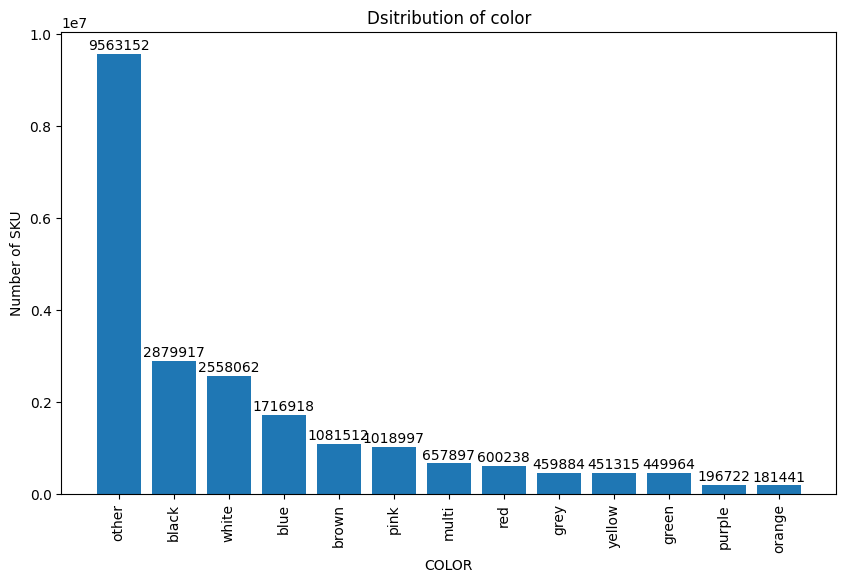

In [36]:
plt.figure(figsize=(10,6))
bars = plt.bar(color_count["index"], color_count["color_group"])
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 1), textcoords='offset points', ha='center', va='bottom')

plt.xticks(rotation=90)
plt.xlabel("COLOR")
plt.ylabel("Number of SKU")
plt.title("Dsitribution of color")
plt.show();

In [37]:
size_dict = {
    'large': ["L", "XL", "XXL", "XXXL", "4X", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "22", "24", "25", "26", "27", "28", "29", "30", "31", "32", "34", 
              "35", "36", "37", "38", "1X", "2X", "3X", "6X", "130M", "120M", "115M", "110M", "105M", "100M", "095M","100N", "095N", "090M", "090N", "090W", "XLT", "2XT", "3XT", "4XT", 
              "16W", "18W", "20W", "22W", "24W", "L    ND", "XL   ND", "XXL  ND", "LT", "2T", "3T", "LARGE"] ,
    'small': ["M", "S", "XS", "XXS", "00", "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "085M", "080M", "075M", "070M", "065M", "060M", "055M", "050M", "085N", "080N", 
              "075N", "070N", "085W", "080W", "075W", "070W", "M    ND", "S    ND"],
    "one": ["ALL", "ONE", "NO SIZE"]
}

In [38]:
def replace_size(text):
    for group, lst in size_dict.items():
        for word in lst:
            if word == text:
                return group
    return "other"

In [39]:
df["SIZE"] = df["SIZE"].str.strip()
df["size_group"] = df["SIZE"].apply(replace_size)

In [40]:
size_count = df["size_group"].value_counts().reset_index()
size_count

,index,size_group
0,other,7480714
1,large,5678931
2,small,5306235
3,one,3350139


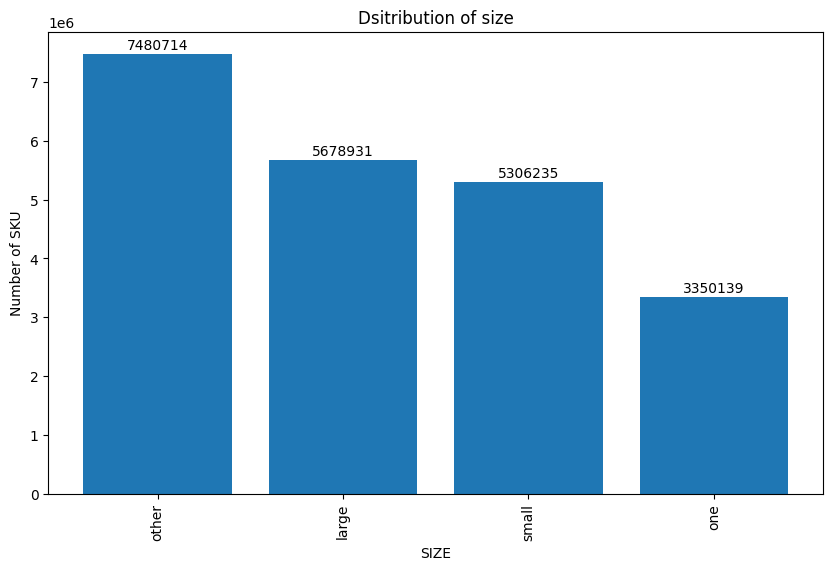

In [41]:
plt.figure(figsize=(10,6))
bars = plt.bar(size_count["index"], size_count["size_group"])
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 1), textcoords='offset points', ha='center', va='bottom')

plt.xticks(rotation=90)
plt.xlabel("SIZE")
plt.ylabel("Number of SKU")
plt.title("Dsitribution of size")
plt.show();

In [42]:
econ = pd.read_csv("econ-popdata.csv")
econ.head()

,Unnamed: 0,ZIP,pop_sum,GDP2004_sum,GDP2005_sum,poverty_sum,median_income
0,0,501,1493350,74117244,74545223,74833,76697.0
1,1,1001,463490,18994298,19035742,73233,41998.0
2,2,1002,229452,8349269,8423852,23283,47989.0
3,3,1003,158080,5719878,5807855,15394,49233.0
4,4,1004,158080,5719878,5807855,15394,49233.0


In [43]:
econ = econ.drop(columns = ["Unnamed: 0"])

In [44]:
from sklearn.cluster import KMeans

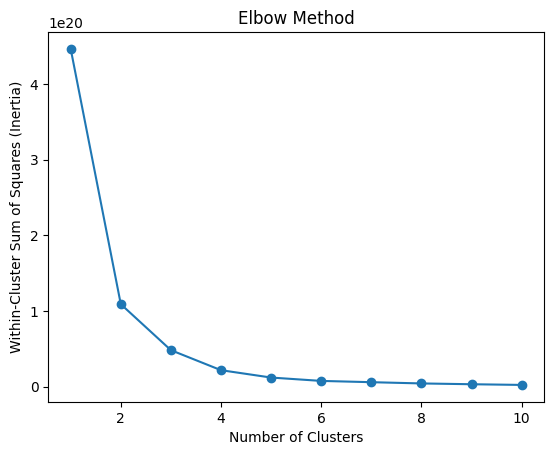

In [45]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=30)
    kmeans.fit(econ)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.show()

In [46]:
# change to kmeans++
k_optimal = 2  

kmeans = KMeans(n_clusters=k_optimal, init='k-means++', random_state=42, n_init=30)
kmeans.fit(econ)
labels = kmeans.labels_
econ["econ_label"] = labels
print(econ["econ_label"].value_counts())

0    36483
1     1092
Name: econ_label, dtype: int64


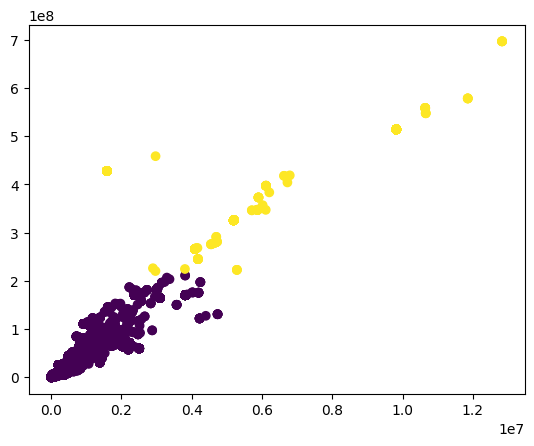

In [47]:
plt.scatter(econ["pop_sum"], econ["GDP2004_sum"], c = econ["econ_label"]);

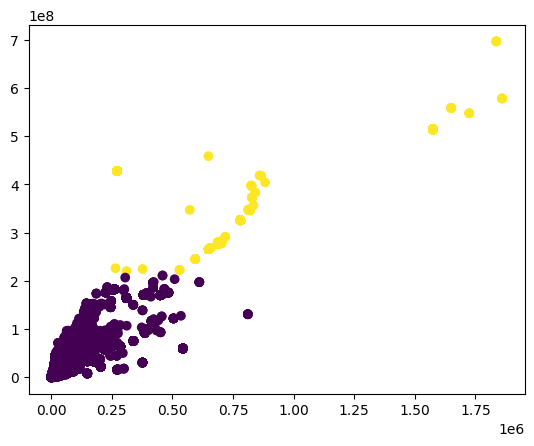

In [48]:
plt.scatter(econ["poverty_sum"], econ["GDP2004_sum"], c = econ["econ_label"]);

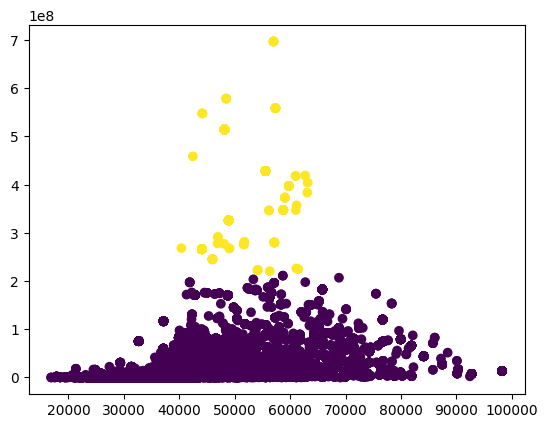

In [49]:
plt.scatter(econ["median_income"], econ["GDP2004_sum"], c = econ["econ_label"]);

In [50]:
len(df)

21816019

In [51]:
df = df.merge(econ, on = "ZIP")
df.head()

,SKU,SALEDATE,INTERID,STYPE,QUANTITY,ORGPRICE,AMT,CITY,STATE,COST,...,holiday_flag,weekend_flag,color_group,size_group,pop_sum,GDP2004_sum,GDP2005_sum,poverty_sum,median_income,econ_label
0,1000007,2005-08-05,744804315,P,1,16.0,16.0,PHOENIX,AZ,7.0,...,0,0,blue,large,3817117,170280673,183974768,450439,48752.0,0
1,1000007,2005-08-11,141107309,P,1,16.0,16.0,PHOENIX,AZ,7.0,...,0,0,blue,large,3817117,170280673,183974768,450439,48752.0,0
2,1000331,2004-09-03,948808599,P,1,20.0,20.0,PHOENIX,AZ,8.5,...,0,0,pink,other,3817117,170280673,183974768,450439,48752.0,0
3,1000331,2004-09-13,857202927,P,1,20.0,20.0,PHOENIX,AZ,8.5,...,0,0,pink,other,3817117,170280673,183974768,450439,48752.0,0
4,1000331,2004-09-14,636608919,P,1,20.0,20.0,PHOENIX,AZ,8.5,...,0,0,pink,other,3817117,170280673,183974768,450439,48752.0,0


In [52]:
len(df)

20113193

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
keep = ["QUANTITY", "ORGPRICE", "AMT", "COST", "RETAIL", "discount", "discount_flag", "holiday_flag", "weekend_flag", "econ_label"]

In [55]:
X = pd.concat([df[keep], pd.get_dummies(df[["color_group", "size_group"]])], axis = 1)
X.head()

,QUANTITY,ORGPRICE,AMT,COST,RETAIL,discount,discount_flag,holiday_flag,weekend_flag,econ_label,...,color_group_other,color_group_pink,color_group_purple,color_group_red,color_group_white,color_group_yellow,size_group_large,size_group_one,size_group_other,size_group_small
0,1,16.0,16.0,7.0,16.0,1.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,16.0,16.0,7.0,16.0,1.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,20.0,20.0,8.5,20.0,1.0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,1,20.0,20.0,8.5,20.0,1.0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,20.0,20.0,8.5,20.0,1.0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [56]:
X.columns

Index(['QUANTITY', 'ORGPRICE', 'AMT', 'COST', 'RETAIL', 'discount',
       'discount_flag', 'holiday_flag', 'weekend_flag', 'econ_label',
       'color_group_black', 'color_group_blue', 'color_group_brown',
       'color_group_green', 'color_group_grey', 'color_group_multi',
       'color_group_orange', 'color_group_other', 'color_group_pink',
       'color_group_purple', 'color_group_red', 'color_group_white',
       'color_group_yellow', 'size_group_large', 'size_group_one',
       'size_group_other', 'size_group_small'],
      dtype='object')

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns=X.columns)

In [59]:
y = (df["STYPE"] == "P").astype(int)
y.value_counts()

1    19101307
0     1011886
Name: STYPE, dtype: int64

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
y_train.value_counts()

1    15280776
0      809778
Name: STYPE, dtype: int64

In [62]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV

In [63]:
undersampler = RandomUnderSampler(sampling_strategy=1, random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

In [64]:
y_resampled.value_counts()

0    809778
1    809778
Name: STYPE, dtype: int64

In [65]:
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

In [66]:
X_resampled = X_resampled.drop(columns = ["color_group_other", "size_group_other", "QUANTITY", "holiday_flag", "ORGPRICE", "AMT"])

In [67]:
X_test = X_test.drop(columns = ["color_group_other", "size_group_other", "QUANTITY", "holiday_flag", "ORGPRICE", "AMT"])

In [68]:
vif_result = calculate_vif(X_resampled)
print(vif_result)

              Variable       VIF
0                 COST  6.140286
1               RETAIL  5.315983
2             discount  3.585895
3        discount_flag  2.507451
4         weekend_flag  1.421603
5           econ_label  1.035467
6    color_group_black  1.372843
7     color_group_blue  1.240982
8    color_group_brown  1.123782
9    color_group_green  1.066225
10    color_group_grey  1.069548
11   color_group_multi  1.085099
12  color_group_orange  1.026577
13    color_group_pink  1.135930
14  color_group_purple  1.024703
15     color_group_red  1.073225
16   color_group_white  1.295989
17  color_group_yellow  1.061143
18    size_group_large  2.314139
19      size_group_one  1.534825
20    size_group_small  2.152683


In [91]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_resampled, y_resampled)

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [92]:
y_pred_train = logreg.predict(X_resampled)

In [93]:
accuracy_score(y_resampled, y_pred_train)

0.6064316392887927

In [94]:
f1_score(y_resampled, y_pred_train)

0.6039608512711159

In [95]:
y_pred = logreg.predict(X_test)

In [96]:
accuracy_score(y_test, y_pred)

0.6014586444371468

In [97]:
f1_score(y_test, y_pred)

0.7411673838756018

In [98]:
param_grid = {
    'C': [0.01, 0.1, 1],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', "lbfgs"]
}
grid_search = GridSearchCV(logreg, param_grid, scoring='f1', cv=5, verbose = 2)
grid_search.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   7.4s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   7.2s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   7.2s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   7.3s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   7.4s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.1s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.1s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.1s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.1s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.1s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   2.2s
[CV] END ...............C=0.01, penalty=l2, solv

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   7.1s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   7.6s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   7.5s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   7.4s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   8.1s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   7.2s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   7.1s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   7.2s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   7.1s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   7.2s
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.1s
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.1s
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.1s
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.1s
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.1s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   2.1s
[CV] END ................C=0

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   7.3s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   7.6s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   7.2s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   7.5s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   7.8s
[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   7.2s
[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   7.2s
[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   7.2s
[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   7.2s
[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   7.2s
[CV] END ......................C=1, penalty=l1, solver=lbfgs; total time=   0.1s
[CV] END ......................C=1, penalty=l1, solver=lbfgs; total time=   0.1s
[CV] END ......................C=1, penalty=l1, solver=lbfgs; total time=   0.1s
[CV] END ......................C=1, penalty=l1, solver=lbfgs; total time=   0.1s
[CV] END ......................C=1, penalty=l1, solver=lbfgs; total time=   0.1s
[CV] END ..................C=1, penalty=l2, solver=liblinear; total time=   2.1s
[CV] END ..................C

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   7.7s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   7.9s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   7.2s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   7.5s


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
T

[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   7.6s


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='f1', verbose=2)

In [99]:
grid_search.best_params_

{'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}

In [100]:
best_model = grid_search.best_estimator_
best_model

LogisticRegression(C=0.01, penalty='l1', random_state=42, solver='liblinear')

In [101]:
y_pred_train = best_model.predict(X_resampled)

In [102]:
accuracy_score(y_resampled, y_pred_train)

0.6065131431083581

In [103]:
f1_score(y_resampled, y_pred_train)

0.6029366317583902

In [104]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.08      0.62      0.13    202108
           1       0.97      0.60      0.74   3820531

    accuracy                           0.60   4022639
   macro avg       0.52      0.61      0.44   4022639
weighted avg       0.92      0.60      0.71   4022639



In [105]:
accuracy_score(y_test, y_pred)

0.5991626392524907

In [106]:
precision_score(y_test, y_pred)

0.9672425518840516

In [107]:
recall_score(y_test, y_pred)

0.5982178917014415

In [108]:
f1_score(y_test, y_pred)

0.7392352870018715

In [109]:
from sklearn.metrics import roc_curve, auc

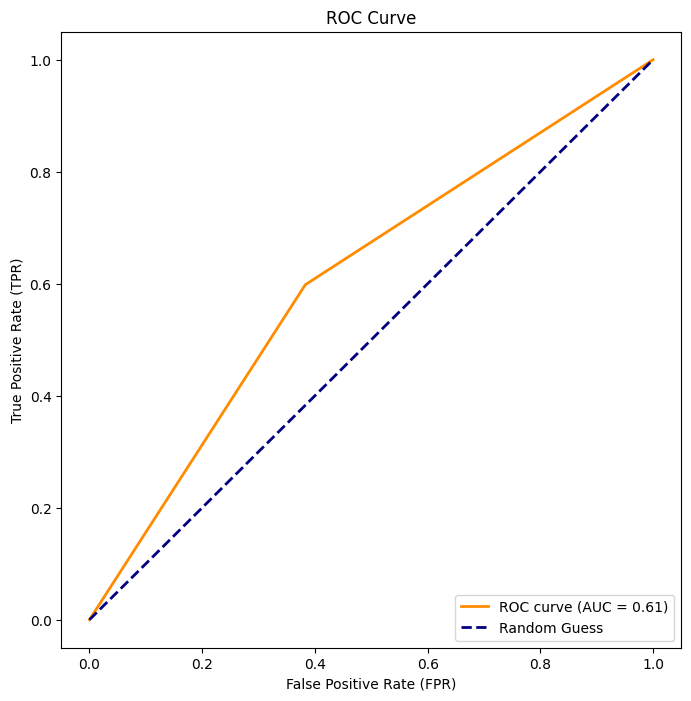

In [117]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [112]:
import statsmodels.api as sm

In [113]:
X_sm = sm.add_constant(X_resampled)
logit_model = sm.Logit(y_resampled, X_sm)
result = logit_model.fit()
result

Optimization terminated successfully.
         Current function value: 0.663243
         Iterations 5


In [114]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  STYPE   No. Observations:              1619556
Model:                          Logit   Df Residuals:                  1619534
Method:                           MLE   Df Model:                           21
Date:                Thu, 30 Nov 2023   Pseudo R-squ.:                 0.04314
Time:                        17:46:11   Log-Likelihood:            -1.0742e+06
converged:                       True   LL-Null:                   -1.1226e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.6376      0.013    130.688      0.000       1.613       1.662
COST                  -0.0260      0.000   -131.873      0.000      -0.026      -0.026
RETAIL                 0.0064      0.000     56.816      0.000       0.006       0.007
discount              -0.8880      0.012    -76.295      0.000      -0.911      -0.865
discount_flag         -0.3855      0.006    -59.690      0.000      -0.398      -0.373
weekend_flag           0.3284      0.004     92.900      0.000       0.322       0.335
econ_label            -0.0791      0.009     -8.774      0.000      -0.097      -0.061
color_group_black     -0.1969      0.005    -39.073      0.000      -0.207      -0.187
color_group_blue      -0.1911      0.006    -31.198      0.000      -0.203      -0.179
color_group_brown     -0.2054      0.008    -26.797      0.000      -0.220      -0.190
color_group_green     -0.3949      0.011    -36.285      0.000      -0.416      -0.374
color_group_grey      -0.2238      0.011    -19.621      0.000      -0.246      -0.201
color_group_multi     -0.2725      0.010    -28.386      0.000      -0.291      -0.254
color_group_orange    -0.2168      0.017    -12.745      0.000      -0.250      -0.183
color_group_pink      -0.2542      0.008    -33.088      0.000      -0.269      -0.239
color_group_purple    -0.2638      0.017    -15.748      0.000      -0.297      -0.231
color_group_red       -0.1868      0.010    -18.723      0.000      -0.206      -0.167
color_group_white     -0.1491      0.005    -27.635      0.000      -0.160      -0.139
color_group_yellow    -0.3756      0.011    -33.974      0.000      -0.397      -0.354
size_group_large      -0.7089      0.005   -156.121      0.000      -0.718      -0.700
size_group_one        -0.2854      0.005    -52.184      0.000      -0.296      -0.275
size_group_small      -0.6435      0.005   -138.849      0.000      -0.653      -0.634
======================================================================================
"""

In [115]:
X_test_sm = sm.add_constant(X_test)
y_pred_sm = result.predict(X_test_sm)
y_pred_binary = (y_pred > 0.5).astype(int)
f1_score(y_test, y_pred_binary)

0.7392352870018715

In [116]:
accuracy_score(y_test, y_pred_binary)

0.5991626392524907